

# Principal Component Analysis (PCA)

## Content of this notebook
1. Brief intro into PCA using the wine-quality dataset. 
2. we will explore the data set a bit. Interesting to look at is the correlation between the variables.
3. we will check how well features can separate the 3 Classes of wine (graphically).
4. we will scale our data and apply PCA.
5. we will check how much information is stored in each newly created principal component and check how well the first 2 principal components can separate the 3 Classes of wine.
6. Math behind PCA (optional)



## Brief primer and history

PCA was invented in 1901 by [Karl Pearson](https://en.wikipedia.org/wiki/Karl_Pearson) as an analogue of the principal axis theorem in mechanics; it was later independently developed and named by [Harold Hotelling](https://en.wikipedia.org/wiki/Harold_Hotelling) in the 1930s.

Principal component analysis (PCA) is a statistical procedure that uses an [orthogonal transformation](https://en.wikipedia.org/wiki/Orthogonal_transformation) to convert a set of observations of possibly correlated variables into a set of values of [linearly uncorrelated](https://en.wikipedia.org/wiki/Correlation_and_dependence) variables called principal components. 

The number of distinct principal components is equal to the smaller of the number of original variables or the number of observations minus one. 

This transformation is defined in such a way that the first principal component has the largest possible [variance](https://en.wikipedia.org/wiki/Variance) (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is [orthogonal](https://en.wikipedia.org/wiki/Orthogonal) the preceding components. The resulting vectors are an uncorrelated [orthogonal basis set](https://en.wikipedia.org/wiki/Orthogonal_basis_set). 

Keep in mind that PCA is sensitive to the relative scaling of the original variables!

If you are interested in the math behind PCA, you will find a section about it at the end of this notebook. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read in the data and perform basic exploratory analysis

In [2]:
df = pd.read_csv('data/wine_data.csv')
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


### Basic statistics

In [3]:
df.iloc[:,1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Box plots by output labels/classes

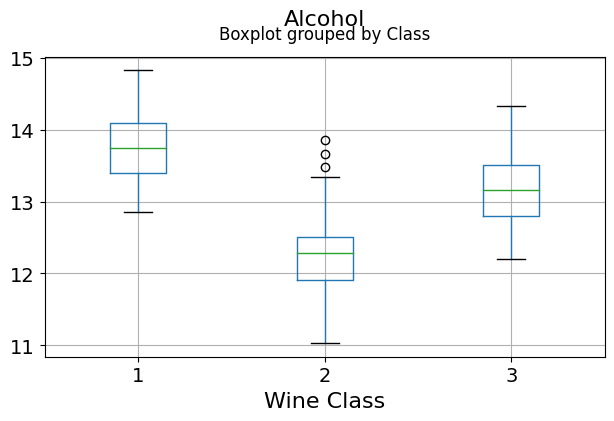

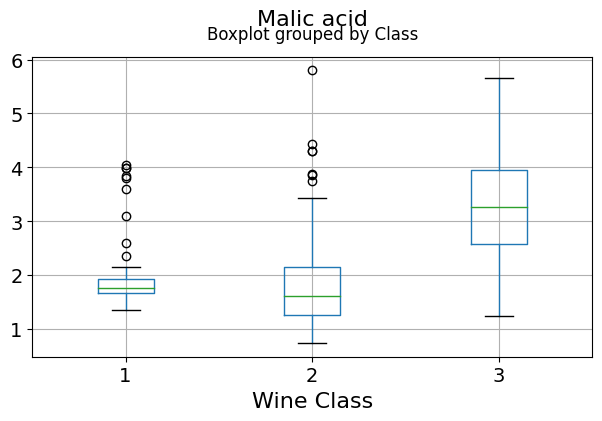

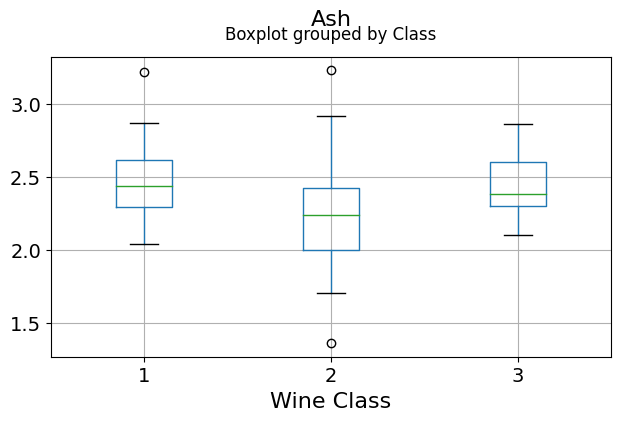

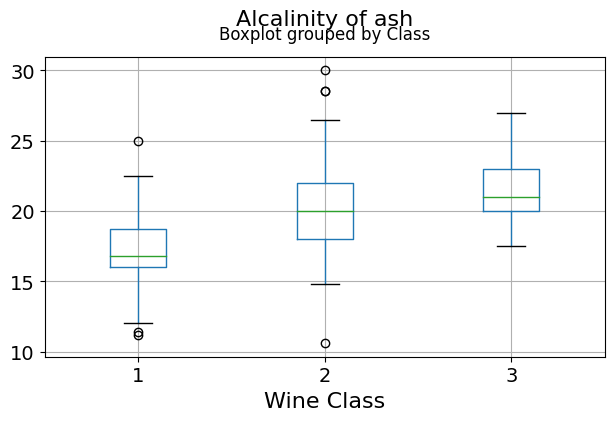

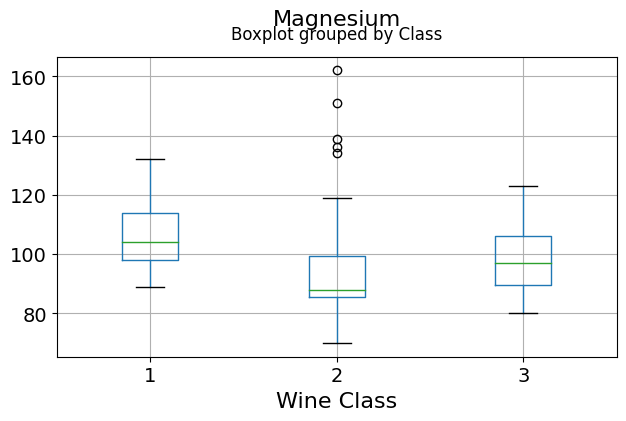

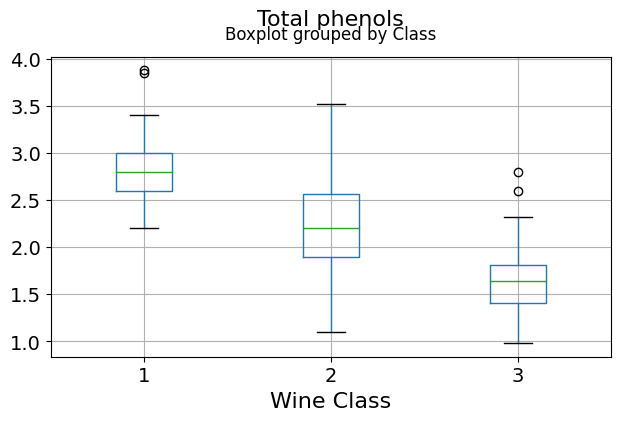

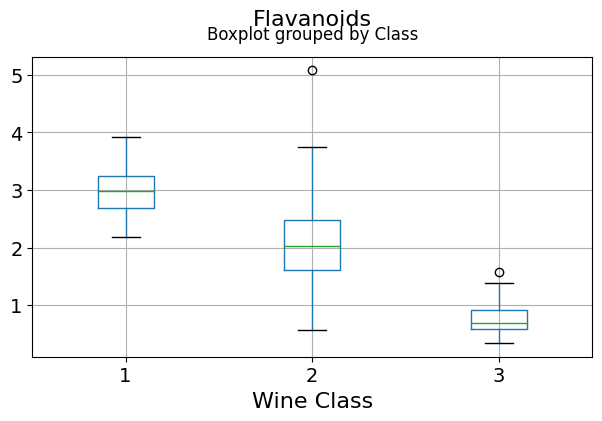

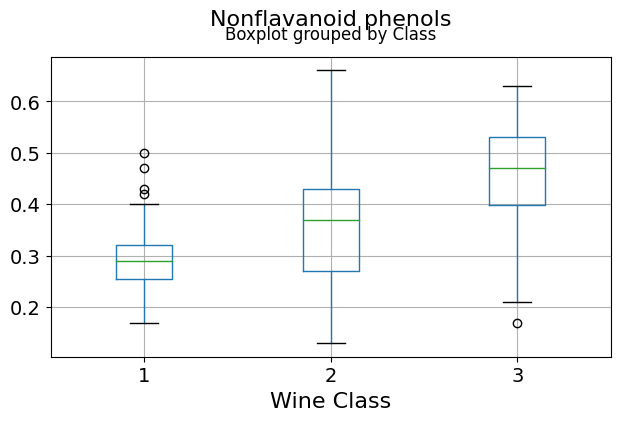

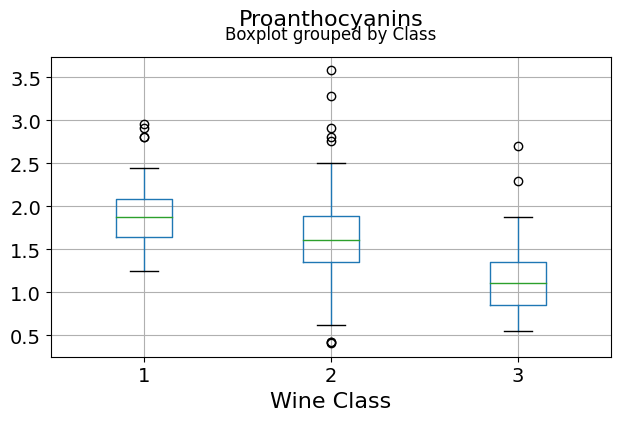

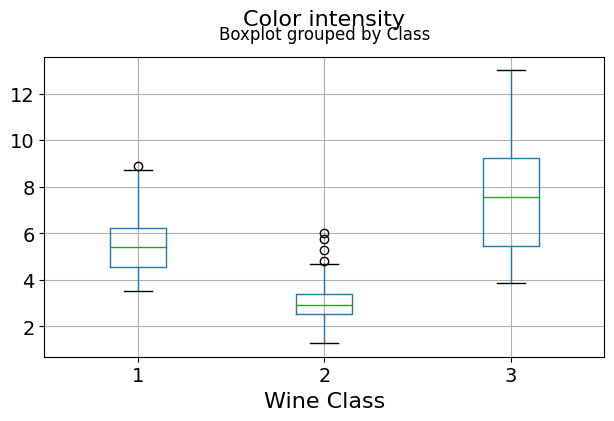

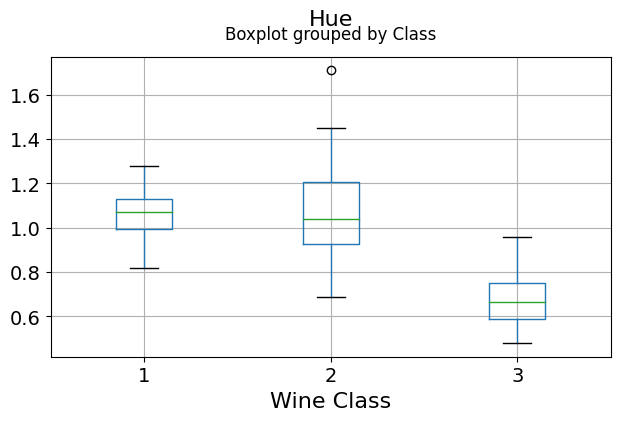

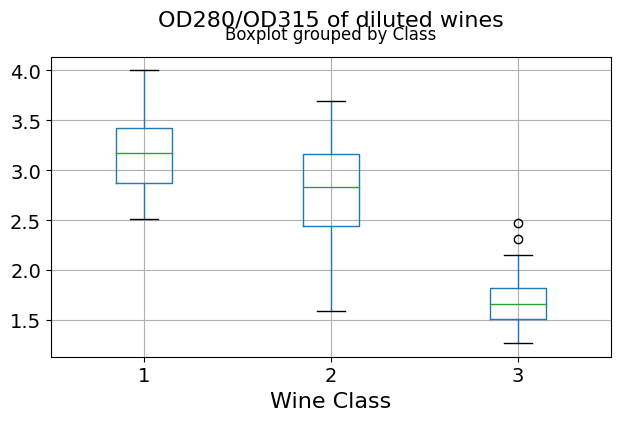

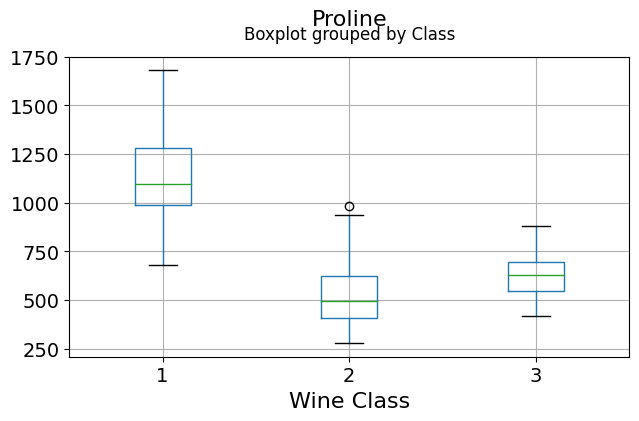

In [4]:
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)

**It can be seen that some features classify the wine labels pretty clearly.** For example, Alcalinity, Total Phenols, or Flavonoids produce box plots with well-separated medians, which are clearly indicative of wine classes.

Below is an example of class separation using two variables

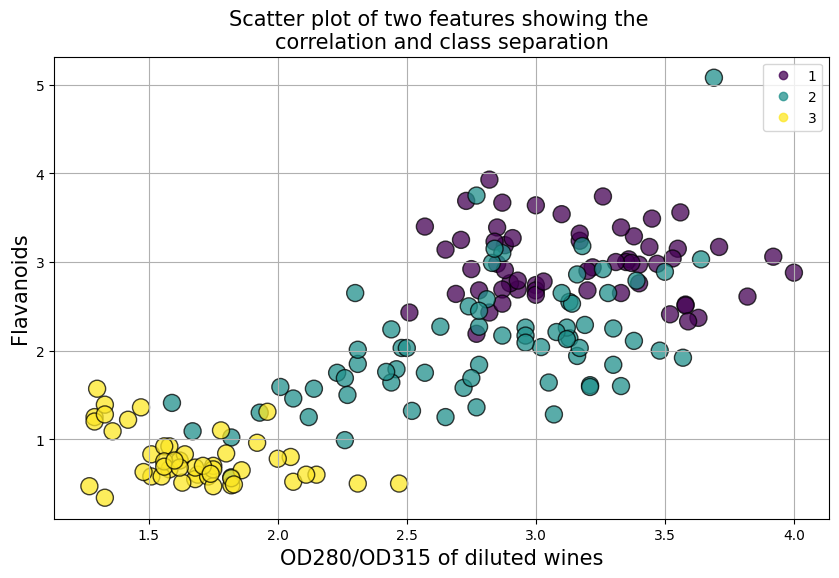

In [5]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(df['OD280/OD315 of diluted wines'],df['Flavanoids'],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
classes = ['1', '2', '3']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("Scatter plot of two features showing the \ncorrelation and class separation",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

### Are the features independent? Plot co-variance matrix


C:\Users\email\AppData\Local\Temp\ipykernel_20972\1388498347.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)


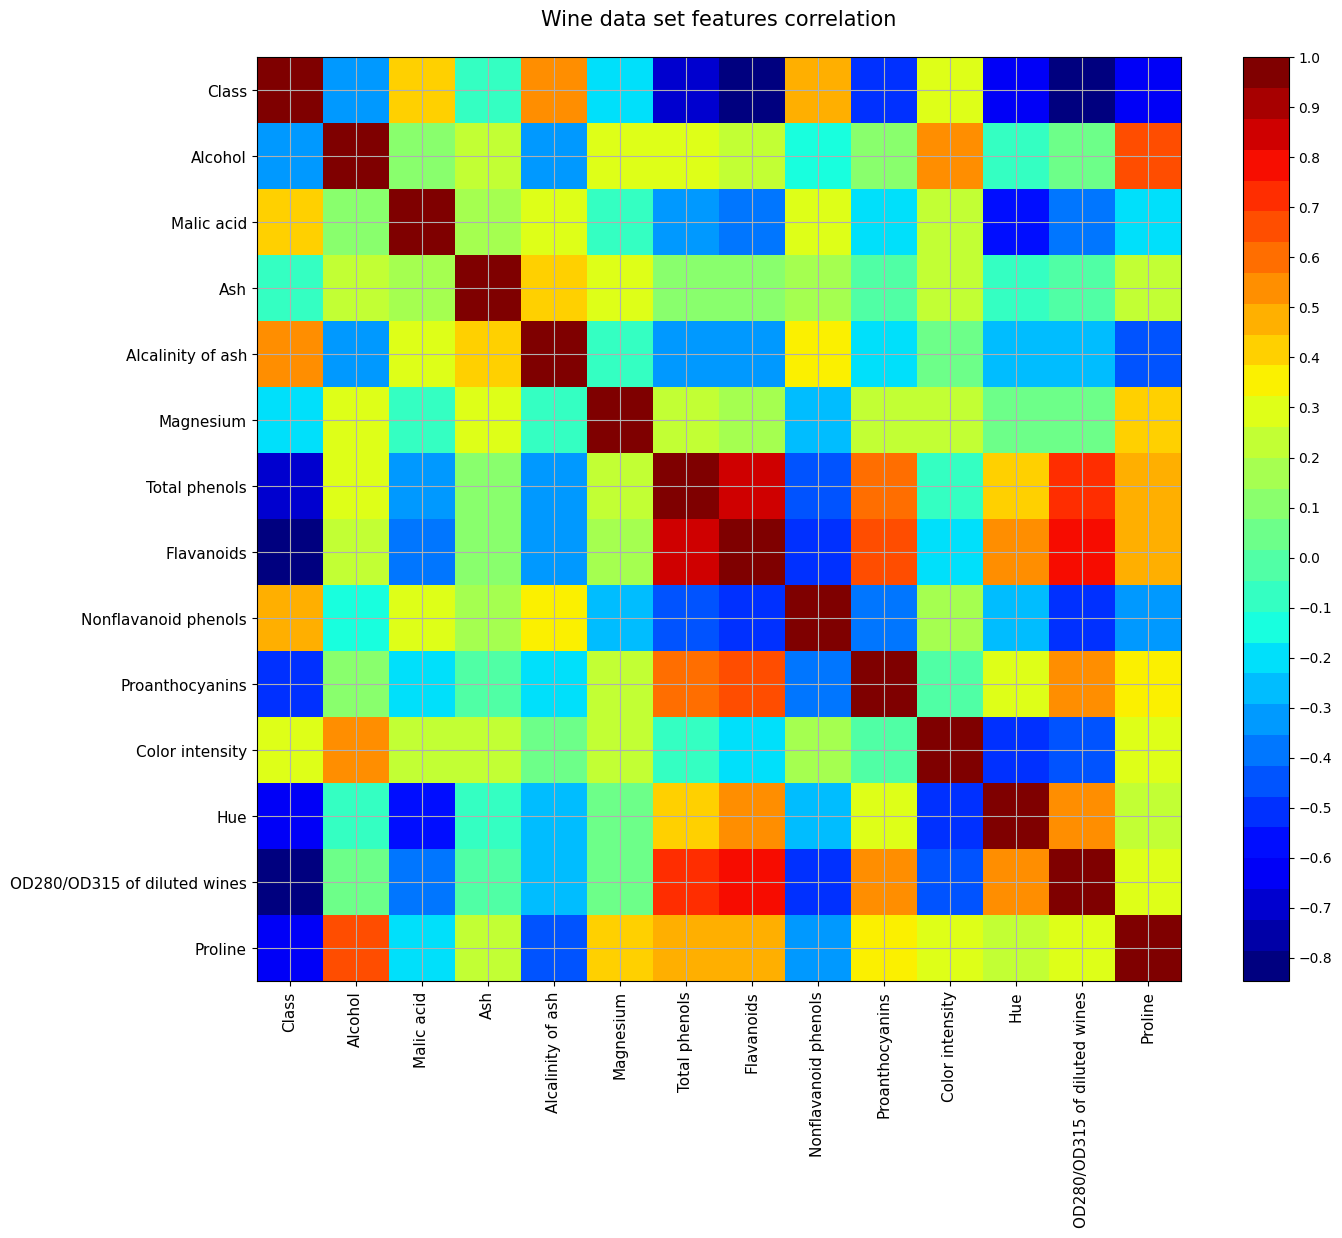

In [6]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticks(np.arange(14))
    ax1.set_xticklabels(labels,fontsize=11, rotation=90)
    ax1.set_yticks(np.arange(14))
    ax1.set_yticklabels(labels,fontsize=11)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

It can be seen that there are some good amount of correlation between features i.e. they are not independent of each other. Independence of variables is a typical preassumption of algorithms (eg.in Naive Bayes). However, we will still go ahead and apply the classifier to see its performance.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Class',axis=1)
y = df['Class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


## Principal Component Analysis

### Data scaling
PCA requires scaling/normalization of the data to work properly.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_train_scaled = scaler.fit_transform(X_train)

In [13]:
df_scaled = pd.DataFrame(data=X_train_scaled,columns=df.columns[1:])

In [14]:
df_scaled.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,-0.297630,1.309714,0.117696,0.915475,0.099139,0.778303,0.527109,0.423164,0.666764,-1.122157,1.048248,0.791350,-0.879055
1,-1.281675,-1.409577,0.823873,-0.469722,-0.428755,-0.153766,0.200057,-1.152321,1.377234,-0.914559,-0.660904,0.723249,-0.691990
2,1.441611,1.419215,0.549249,-1.799510,2.135303,1.029814,0.998449,-1.302367,0.897667,-0.027942,-0.233616,1.336158,0.095653
3,-0.412054,-0.998946,-1.843906,-0.331202,-0.881236,-1.263371,-0.617573,-0.627159,-0.398941,-1.174056,0.407316,0.301022,-0.554152
4,-0.915519,-0.752568,-0.235392,0.860067,-0.730409,-0.775145,-0.300140,0.423164,-0.025944,-1.174056,1.646451,-0.393609,-0.774036


In [15]:
df_scaled.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01
mean,-5.750706e-16,-7.893966e-17,-4.621771e-16,1.390897e-16,-2.744372e-16,6.031380e-16,-1.492252e-16,-1.833739e-16,2.289055e-16,-2.420037e-16,5.039664e-16,4.490790e-17,1.621674e-16
std,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00
min,-2.208507e+00,-1.409577e+00,-3.962436e+00,-2.519812e+00,-2.238679e+00,-1.781187e+00,-1.473680e+00,-1.827528e+00,-2.050783e+00,-1.481128e+00,-1.985496e+00,-1.742010e+00,-1.486197e+00
25%,-7.667678e-01,-7.251921e-01,-4.707845e-01,-4.697215e-01,-8.812363e-01,-8.935028e-01,-7.714799e-01,-8.522283e-01,-5.765583e-01,-8.453593e-01,-7.036327e-01,-1.088240e+00,-7.740361e-01
50%,-1.285660e-04,-4.240626e-01,3.923204e-02,8.435688e-02,2.372559e-02,-1.537656e-01,-1.558523e-01,-2.697459e-02,-7.922937e-02,-7.119173e-02,2.275668e-02,3.010220e-01,-3.309870e-01
75%,8.694921e-01,7.530802e-01,6.669448e-01,6.384353e-01,6.270335e-01,8.522770e-01,8.541616e-01,7.982791e-01,5.246700e-01,6.856760e-01,5.782309e-01,8.322102e-01,6.207481e-01
max,2.139596e+00,2.933988e+00,3.373956e+00,2.854749e+00,2.964852e+00,2.331751e+00,2.960762e+00,2.148694e+00,3.561929e+00,2.437284e+00,3.270144e+00,1.581322e+00,2.678465e+00


### PCA class import and analysis

[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) is also already implemented in scikit-learn. Check out the parameters that can be set for PCA and the attributes that are calculated after PCA is performed.

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=None)

In [18]:
df_scaled_pca = pca.fit(df_scaled)

In [25]:
# TODO: try out some attributes of pca and check your understanding
pca.feature_names_in_


array(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'], dtype=object)

#### Plot the _explained variance ratio_ for each principal component


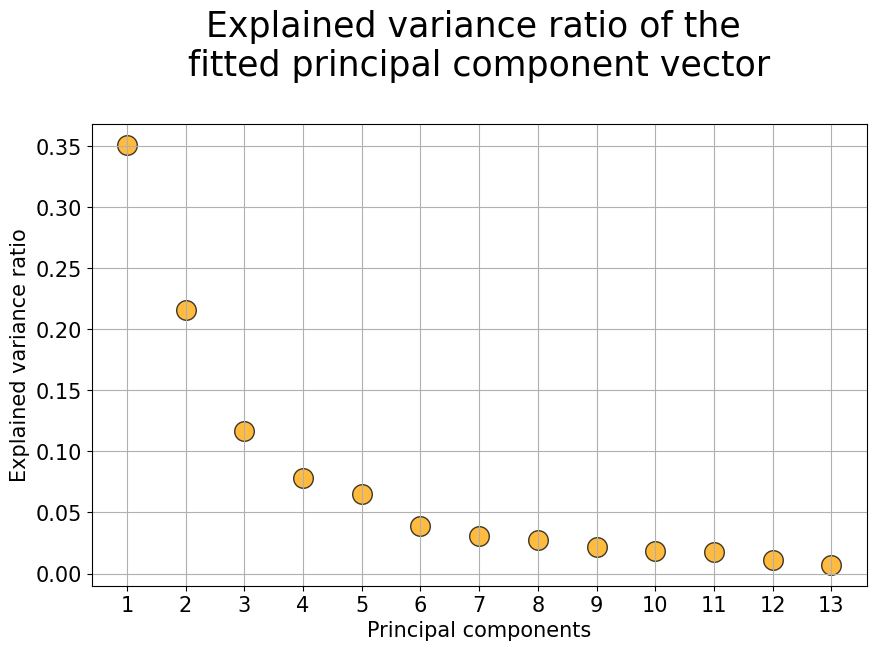

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(df_scaled_pca.explained_variance_ratio_))],
            y=df_scaled_pca.explained_variance_ratio_,
            s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(df_scaled_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

The above plot means that the **first principal component explains about 36%** of the total variance in the data and the **second component explians further 20%**. Therefore, if we just consider first two components, they together explain **56%** of the total variance.

### Showing better class separation using principal components

#### Transform the scaled data set using the fitted PCA object

In [27]:
X_train_scaled_trans = pca.transform(df_scaled)

#### Put it in a data frame

In [28]:
X_train_scaled_trans = pd.DataFrame(data=X_train_scaled_trans)
X_train_scaled_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.532719,1.128980,1.624734,1.012234,0.367711,1.139429,0.413740,0.884195,-0.464465,0.035448,0.202628,0.234539,0.087618
1,0.962534,1.497076,0.478916,0.459144,-1.095390,-1.075519,-0.698871,-0.837787,1.151283,0.068015,-1.074945,0.466849,-0.646469
2,2.596213,-1.913340,-0.097702,1.125020,-1.075538,1.918397,0.512122,0.189089,-0.050904,0.166129,-1.205388,0.321344,-0.450754
3,-0.438061,2.295278,-1.706480,-0.479979,-0.416681,-0.160683,0.417044,0.272933,0.422654,-0.736986,-0.226510,-0.318827,0.026271
4,-0.651060,2.290444,0.494460,-0.902955,0.574160,-0.259077,-0.003962,1.014073,0.435726,0.241661,0.107230,0.015845,0.179213
5,0.884454,1.407479,0.987960,0.964374,-0.807567,0.186069,-0.751412,-1.176707,-0.101678,-0.039423,0.097090,-0.049743,-0.026008
6,-3.087325,-2.134032,-0.164354,1.314328,0.714874,1.064480,0.822389,-0.107489,0.053676,0.115950,0.401729,-0.258378,0.005467
7,-2.586943,-0.586566,0.822667,-0.673020,0.595525,0.804054,-0.187208,0.079044,-0.164567,-0.158370,-0.261926,0.095526,-0.416440
8,2.871368,-0.534468,-1.189845,0.666247,-0.319848,-0.544305,0.242967,-0.219245,-0.448300,-0.448815,-0.082020,-0.098390,0.183686
9,1.012246,2.128686,0.029319,-0.029017,-1.456634,0.384794,0.029922,-0.161939,-0.460398,1.283822,0.157723,-0.211523,-0.467272


#### Plot the first two columns of this transformed data set with the color set to original ground truth class label

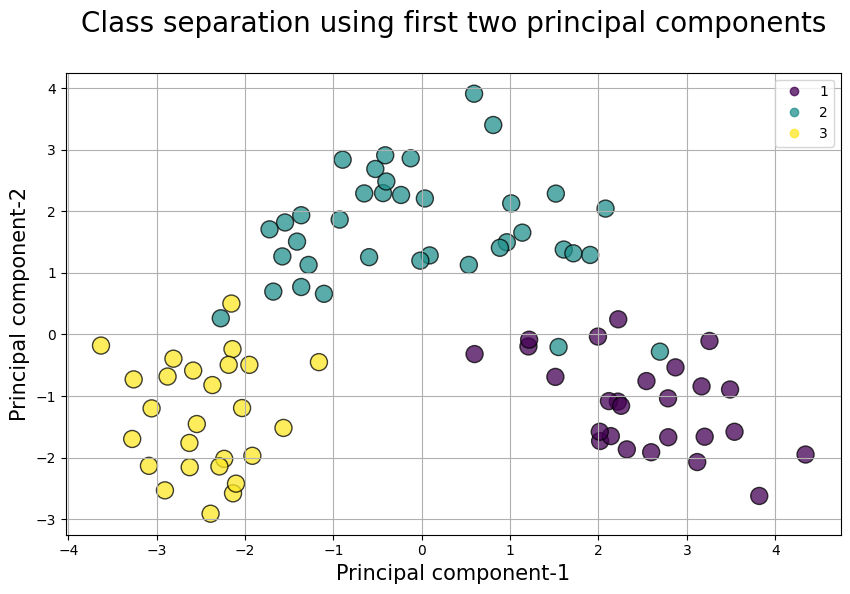

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_scaled_trans[0],X_train_scaled_trans[1],c=y_train,edgecolors='k',alpha=0.75,s=150)
classes = ['1', '2', '3']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

Graphically it's clear that the first 2 principal components can separate the classes better than the 2 most correlated variables with the target variable.
Let's see if this intuition of the graphs holds true when using a model to predict the Class of a wine.
Because we mentioned the naive bayes before, let's test it using this classifier. 

If you are not familiar with the naive bayes classifier - that is not a problem. You can learn more about it on [scikit-learn.org](https://scikit-learn.org/stable/modules/naive_bayes.html) but for this notebook it doesn't really matter. 


In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
variables = ["Flavanoids", "OD280/OD315 of diluted wines"]

In [32]:
#TODO: instantiate the model and train it on X_train, y_train (data without any transformations)
clf = GaussianNB()
clf.fit(X_train[variables], y_train)

GaussianNB()

In [33]:
#TODO: predict the classes with the model on X_test
y_pred = clf.predict(X_test[variables])

In [34]:
# we will use the accuracy score for an easy comparison of results
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.797752808988764

Let's check how well the model deals when using the first and second principal component.
Remember how the transformed data looks like:

In [35]:
X_train_scaled_trans.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.532719,1.12898,1.624734,1.012234,0.367711,1.139429,0.41374,0.884195,-0.464465,0.035448,0.202628,0.234539,0.087618


In [36]:
# the first and second component are stored in column 0 and 1
variables = [0,1]

In [37]:
#TODO: instantiate the model and train it on X_train_scaled_trans with the variables defined before, y_train (data any transformations)
clf2 = GaussianNB()
clf2.fit(X_train_scaled_trans[variables], y_train)

GaussianNB()

Before we can predict on the test data, we need to transform it first. 
Remember, we used standard scaler and PCA to transform our data.

In [38]:
#TODO: use implemented standard scaler to scale data
X_test_scaled = scaler.transform(X_test)

#TODO: transform the data with implemented PCA
X_test_scaled_trans = pca.transform(X_test_scaled)

c:\Users\email\Desktop\neuefische\DS_Neuefisch\250200_DS_Neuefisch\0318_Dimensionality_reduction\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [39]:
X_test_scaled_trans = pd.DataFrame(data=X_test_scaled_trans)

In [40]:
#TODO: predict y
y_pred = clf2.predict(X_test_scaled_trans[[0,1]])

In [41]:
#TODO: calculate the accuracy
accuracy_score(y_test, y_pred)

0.9325842696629213

- What are your conclusions with these classifications?
- Which variables yield better results?

Feel free to experiment further...
For example 
- test a different classifier or 
- add more variables to your model.


## Mathematical details
PCA is mathematically defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

Consider a data matrix, $\mathbf{X}$, with column-wise zero empirical mean (the sample mean of each column has been shifted to zero), where each of the $n$ rows represents a different repetition of the experiment, and each of the $p$ columns gives a particular kind of feature (say, the results from a particular sensor).

Mathematically, the transformation is defined by a set of p-dimensional vectors of weights or loadings
${\displaystyle \mathbf {w} _{(k)}=(w_{1},\dots ,w_{p})_{(k)}} \mathbf {w} _{(k)}=(w_{1},\dots ,w_{p})_{(k)}$ that map each row vector ${\displaystyle \mathbf {x} _{(i)}} \mathbf{x}_{(i)}$ of $\mathbf{X}$ to a new vector of principal component scores ${\displaystyle \mathbf {t} _{(i)}=(t_{1},\dots ,t_{m})_{(i)}}$ given by

$${\displaystyle {t_{k}}_{(i)}=\mathbf {x} _{(i)}\cdot \mathbf {w} _{(k)}\qquad \mathrm {for} \qquad i=1,\dots ,n\qquad k=1,\dots ,m} {\displaystyle {t_{k}}_{(i)}=\mathbf {x} _{(i)}\cdot \mathbf {w} _{(k)}\qquad \mathrm {for} \qquad i=1,\dots ,n\qquad k=1,\dots ,m}$$

in such a way that the individual variables ${\displaystyle t_{1},\dots ,t_{m}}$ of t considered over the data set successively inherit the maximum possible variance from $\mathbf{x}$, with each loading vector $\mathbf{w}$ constrained to be a unit vector.

In order to maximize variance, the first loading vector $\mathbf {w} _{(1)}$ thus has to satisfy

$$ {\displaystyle \mathbf {w} _{(1)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\sum _{i}\left(t_{1}\right)_{(i)}^{2}\right\}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\sum _{i}\left(\mathbf {x} _{(i)}\cdot \mathbf {w} \right)^{2}\right\}}$$

Equivalently, writing this in matrix form gives

$${\displaystyle \mathbf {w} _{(1)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\{\Vert \mathbf {Xw} \Vert ^{2}\}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\mathbf {w} ^{T}\mathbf {X} ^{T}\mathbf {Xw} \right\}}$$

Since $\mathbf {w} _{(1)}$ has been defined to be a unit vector, it equivalently also satisfies
$${\displaystyle \mathbf {w} _{(1)}={\operatorname {\arg \,max} }\,\left\{{\frac {\mathbf {w} ^{T}\mathbf {X} ^{T}\mathbf {Xw} }{\mathbf {w} ^{T}\mathbf {w} }}\right\}}$$

With $\mathbf {w} _{(1)}$ found, the first principal component of a data vector $\mathbf {x} _{(i)}$ can then be given as a score $\mathbf {t} _{(i)}$ = $\mathbf {x} _{(i)}$ ⋅ $\mathbf {w} _{(1)}$ in the transformed co-ordinates, or as the corresponding vector in the original variables, {$\mathbf {x} _{(i)}$ ⋅ $\mathbf {w} _{(1)}$} $\mathbf {w} _{(1)}$.

The $k^{th}$ component can be found by subtracting the first $k$ − 1 principal components from $\mathbf{X}$:

$${\displaystyle \mathbf {\hat {X}} _{k}=\mathbf {X} -\sum _{s=1}^{k-1}\mathbf {X} \mathbf {w} _{(s)}\mathbf {w} _{(s)}^{\rm {T}}}$$
and then finding the loading vector which extracts the maximum variance from this new data matrix

$${\displaystyle \mathbf {w} _{(k)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {arg\,max} }}\left\{\Vert \mathbf {\hat {X}} _{k}\mathbf {w} \Vert ^{2}\right\}={\operatorname {\arg \,max} }\,\left\{{\tfrac {\mathbf {w} ^{T}\mathbf {\hat {X}} _{k}^{T}\mathbf {\hat {X}} _{k}\mathbf {w} }{\mathbf {w} ^{T}\mathbf {w} }}\right\}}$$

Computing the [singular value decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition) is now the standard way to calculate a principal components analysis from a data matrix.